<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-12-15 10:37:56
-------------------
qualified stocks: 86
with latest results: 25
still star stocks: 15
-------------------
Initial Investment:  1.28 C
CY Investment:  1.55 C
Reserve:  66.76 K
Current:  1.41 C
-------------------
Today PnL: 2.50 K (0.02%)
Current PnL: -26.45 L (-17.08%)
CY Booked + Current PnL: -12.16 L (-7.85%)
-------------------
Total profit:  1.38 L
Total loss:  -27.82 L
-------------------
Total Booked + Current PnL: 14.82 L (11.6%)
Total Booked PnL: 41.27 L (32.29%)
Curr Year Booked PnL: 14.29 L (10.16%)
Prev Year Booked PnL: 26.98 L (21.11%)
Est FTT:  2.32 C
Est FTT PnL: 91.08 L (64.78%)
Deployed:  1.28 C
Current:  1.41 C
CAGR/XIRR %: 5.32%


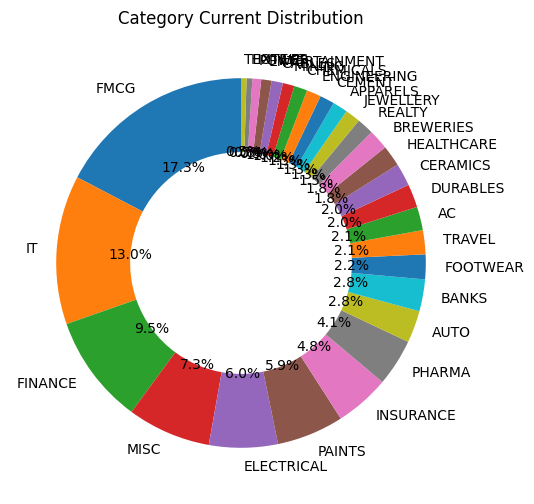

In [23]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'FTT','Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'FTT Amt', 'Current P/L', 'Current', 'Dev%_PE', 'RSI_14','Conviction', 'Spread%',  'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [24]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
77,TTKPRESTIG,770.00,0.04,-16.70,20.16,0.09,16923.0,-16832.0,83945.0,94.88,43.0,M-SC,2.36,253.0,-0.99,0.60,10.29,OX40N,NTT,DURABLES
39,INDIGOPNTS,1408.00,0.63,-11.79,13.39,0.02,20617.0,-20588.0,153971.0,134.93,54.0,M-SC,15.36,234.0,-1.00,1.10,33.93,OX40N,NTT,PAINTS
50,MASFIN,398.61,1.32,0.21,21.79,22.05,21396.0,210.0,98190.0,-13.73,61.0,H-SC,7.22,164.0,0.01,0.70,42.73,XR,ATH,FINANCE
82,VOLTAS,1530.00,-0.40,7.31,11.54,19.69,23744.0,14013.0,205755.0,-3.15,53.0,X-MC,2.54,78.0,0.59,1.47,14.60,XY25,NTT,AC
43,ITC,452.00,0.09,-1.85,12.87,10.78,30356.0,-4453.0,235865.0,-41.56,42.0,X-LC,1.93,5.0,-0.15,1.69,3.29,X40,NTT,FMCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,3906.00,0.62,-25.08,119.11,64.15,212337.0,-59681.0,178270.0,-56.31,37.0,X-SC,2.41,82.0,-0.28,1.27,0.62,XY24,BTT,CEMENT
8,AWL,485.00,-0.80,-21.80,96.28,53.50,227202.0,-65771.0,235980.0,-62.10,34.0,X-MC,2.47,58.0,-0.29,1.69,4.81,XY24,NTT,FMCG
60,REPCOHOME,880.00,0.71,-12.79,117.66,89.82,293982.0,-36648.0,249857.0,-56.78,48.0,H-SC,5.95,160.0,-0.12,1.79,32.19,XY24,NTT,FINANCE
10,BANDHANBNK,400.00,-0.13,-28.15,167.79,92.42,335842.0,-78403.0,200156.0,40.80,50.0,H-SC,8.89,170.0,-0.23,1.43,15.67,XY24,NTT,BANKS


In [25]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
2,ABBOTINDIA,35195.00,-0.45,-6.45,26.21,18.07,43852.0,-11545.0,167310.0,-19.83,32.0,X-MC,5.48,63.0,-0.26,1.20,10.87,X40,ATH,PHARMA
3,ACC,3906.00,0.62,-25.08,119.11,64.15,212337.0,-59681.0,178270.0,-56.31,37.0,X-SC,2.41,82.0,-0.28,1.27,0.62,XY24,BTT,CEMENT
5,ASIANPAINT,3460.25,0.91,-2.48,24.02,20.95,58974.0,-6248.0,245520.0,-3.44,48.0,X-LC,17.89,31.0,-0.11,1.75,32.27,X40,ATH,PAINTS
8,AWL,485.00,-0.80,-21.80,96.28,53.50,227202.0,-65771.0,235980.0,-62.10,34.0,X-MC,2.47,58.0,-0.29,1.69,4.81,XY24,NTT,FMCG
9,BAJAJHFL,181.50,-1.34,-19.18,92.37,55.47,181623.0,-46661.0,196625.0,-28.46,22.0,X-MC,12.51,64.0,-0.26,1.41,0.75,X40N,ATH,FINANCE
11,BATAINDIA,2096.00,-0.22,-38.20,118.77,35.20,94448.0,-49148.0,79522.0,4.26,34.0,X-SC,15.99,92.0,-0.52,0.57,1.01,X40,NTT,FOOTWEAR
12,BERGEPAINT,680.00,-0.32,-3.89,26.04,21.14,56897.0,-8841.0,218498.0,-10.72,40.0,X-MC,3.28,74.0,-0.16,1.56,23.16,XY24,NTT,PAINTS
15,CAMS,950.00,-0.46,-1.51,26.38,24.48,65438.0,-3795.0,248061.0,-81.32,43.0,X-SC,0.66,86.0,-0.06,1.77,21.28,X40N,NTT,MISC
17,COALINDIA,484.83,-0.29,-6.00,26.84,19.23,37960.0,-9028.0,141432.0,9.65,54.0,L-LC,1.83,179.0,-0.24,1.01,14.00,XY25,ATH,MINING
19,COLPAL,3726.84,-0.16,-18.06,72.71,41.51,156901.0,-47575.0,215790.0,-2.34,47.0,X-MC,7.27,61.0,-0.30,1.54,2.66,XY25,ATH,FMCG


In [26]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,593.00,1.64,-40.41,89.46,12.90,116484.0,-88288.0,130208.0,92.31,46.0,H-SC,12.04,161.0,-0.76,0.93,8.27,OX40N,NTT,FINANCE
16,CERA,9475.00,-1.28,-32.13,82.53,23.89,98535.0,-56510.0,119393.0,-34.61,28.0,H-SC,10.30,157.0,-0.57,0.85,3.11,OX40N,NTT,CERAMICS
25,FINCABLES,1641.55,0.82,-5.49,119.99,107.91,167433.0,-8105.0,139539.0,-22.98,45.0,M-SC,12.66,216.0,-0.05,1.00,4.04,OX40N,ATH,CABLES
39,INDIGOPNTS,1408.00,0.63,-11.79,13.39,0.02,20617.0,-20588.0,153971.0,134.93,54.0,M-SC,15.36,234.0,-1.00,1.10,33.93,OX40N,NTT,PAINTS
44,JCHAC,2282.00,2.45,-35.93,56.06,-0.01,45907.0,-45916.0,81889.0,16660.87,30.0,M-SC,6.68,233.0,-1.00,0.59,4.81,OX40N,NTT,AC
47,KANSAINER,340.00,0.59,-24.97,51.23,13.47,103658.0,-67329.0,202338.0,-69.09,34.0,H-SC,4.78,158.0,-0.65,1.45,2.88,XY24,NTT,PAINTS
56,RAJESHEXPO,518.00,0.61,-62.63,167.80,0.07,86013.0,-85918.0,51259.0,1778.79,59.0,L-SC,2.42,268.0,-1.00,0.37,27.48,OX40N,NTT,JEWELLERY
63,SFL,1287.00,0.33,-42.99,122.11,26.63,182552.0,-112720.0,149498.0,13.15,29.0,M-SC,11.40,239.0,-0.62,1.07,0.33,XY24,NTT,MISC
66,SIS,528.00,-0.14,-25.50,62.76,21.26,51916.0,-28310.0,82722.0,1949.74,43.0,H-SC,4.94,166.0,-0.55,0.59,11.77,OX40N,NTT,MISC
70,SYMPHONY,1306.00,0.64,-33.03,49.27,-0.03,56472.0,-56523.0,114618.0,-46.27,47.0,M-SC,16.76,206.0,-1.00,0.82,2.05,OX40N,NTT,DURABLES


In [27]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,3906.00,0.62,-25.08,119.11,64.15,212337.0,-59681.0,178270.0,-56.31,37.0,X-SC,2.41,82.0,-0.28,1.27,0.62,XY24,BTT,CEMENT
7,ATULAUTO,844.00,-0.71,-24.36,92.45,45.57,137849.0,-48025.0,149107.0,3218.92,40.0,M-SC,4.41,244.0,-0.35,1.07,5.71,XY24,NTT,AUTO
8,AWL,485.00,-0.80,-21.80,96.28,53.50,227202.0,-65771.0,235980.0,-62.10,34.0,X-MC,2.47,58.0,-0.29,1.69,4.81,XY24,NTT,FMCG
10,BANDHANBNK,400.00,-0.13,-28.15,167.79,92.42,335842.0,-78403.0,200156.0,40.80,50.0,H-SC,8.89,170.0,-0.23,1.43,15.67,XY24,NTT,BANKS
12,BERGEPAINT,680.00,-0.32,-3.89,26.04,21.14,56897.0,-8841.0,218498.0,-10.72,40.0,X-MC,3.28,74.0,-0.16,1.56,23.16,XY24,NTT,PAINTS
14,CAMPUS,393.00,-1.56,-12.08,51.59,33.28,76102.0,-20262.0,147513.0,-29.23,36.0,M-SC,2.63,222.0,-0.27,1.05,14.33,XY24,NTT,FOOTWEAR
17,COALINDIA,484.83,-0.29,-6.00,26.84,19.23,37960.0,-9028.0,141432.0,9.65,54.0,L-LC,1.83,179.0,-0.24,1.01,14.00,XY25,ATH,MINING
19,COLPAL,3726.84,-0.16,-18.06,72.71,41.51,156901.0,-47575.0,215790.0,-2.34,47.0,X-MC,7.27,61.0,-0.30,1.54,2.66,XY25,ATH,FMCG
20,DABUR,735.00,0.23,-3.00,48.14,43.70,115841.0,-7435.0,240633.0,-11.07,36.0,X-MC,2.72,72.0,-0.06,1.72,11.60,XY24,BTT,FMCG
24,EASEMYTRIP,26.40,0.39,-57.51,242.86,45.70,182478.0,-101678.0,75137.0,-21.95,49.0,M-SC,23.97,205.0,-0.56,0.54,8.30,XY24,NTT,TRAVEL


In [28]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,ABB,7934.00,-1.20,-4.33,52.15,45.57,130529.0,-11323.0,250296.0,-38.56,54.0,H-MC,4.60,120.0,-0.09,1.79,6.50,AR,NTT,ELECTRICAL
4,ALKYLAMINE,4546.37,0.49,-31.68,183.42,93.63,126516.0,-31987.0,68976.0,-26.89,25.0,H-SC,12.16,145.0,-0.25,0.49,2.74,SR,ATH,CHEMICALS
6,ASIANTILES,137.00,-1.64,-17.12,119.20,81.67,92678.0,-16060.0,77750.0,6988.89,43.0,L-SC,13.00,271.0,-0.17,0.56,50.57,XR,NTT,CERAMICS
13,BSOFT,831.70,0.52,-21.69,92.55,50.79,101941.0,-30506.0,110147.0,0.50,68.0,H-SC,6.07,151.0,-0.30,0.79,28.25,XR,ATH,IT
18,COFFEEDAY,80.00,11.66,-38.48,119.90,35.27,83750.0,-43699.0,69850.0,-53.72,52.0,L-SC,10.83,270.0,-0.52,0.50,70.96,XR,NTT,HOTELS
21,DEN,75.00,1.27,-41.28,141.94,42.07,70402.0,-34864.0,49600.0,76.17,42.0,M-SC,7.85,235.0,-0.50,0.35,5.33,AR,NTT,ENTERTAINMENT
29,HAPPSTMNDS,1480.71,-0.04,-38.79,202.00,84.85,158465.0,-49717.0,78448.0,-27.28,41.0,H-SC,13.55,147.0,-0.31,0.56,0.68,AR,ATH,IT
30,HATHWAY,31.40,0.55,-29.80,146.86,73.29,112084.0,-32400.0,76320.0,787.68,41.0,H-SC,7.91,172.0,-0.29,0.55,2.91,XR,NTT,ENTERTAINMENT
37,IEX,219.00,0.31,-2.51,52.45,48.63,102242.0,-5021.0,194933.0,-35.06,53.0,H-SC,14.02,136.0,-0.05,1.39,8.75,XR,NTT,MISC
38,INDIAMART,4810.62,1.16,-2.97,113.05,106.72,135291.0,-3662.0,119674.0,-51.96,37.0,H-SC,2.68,139.0,-0.03,0.86,19.71,AR,ATH,MISC


In [29]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.32
1,20,37.28
2,30,52.22


In [30]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,45.06
MC,30.89
LC,24.08


In [31]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,26.82
X40,22.98
X40N,13.00
XR,9.87
XY25,9.05
AR,9.02
OX40N,7.54
SR,0.98
MH,0.77


In [32]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-MC,24.41
H-SC,23.90
X-LC,20.64
M-SC,11.69
X-SC,8.04
H-MC,4.81
L-SC,1.43
M-MC,1.33
M-LC,1.30


In [33]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
X40       X-MC          10.52
          X-LC          10.16
XY24      H-SC           9.32
XR        H-SC           6.08
X40N      X-MC           5.91
XY24      M-SC           5.53
          X-MC           4.97
OX40N     M-SC           4.11
X40N      X-LC           3.81
XY25      X-LC           3.70
AR        H-SC           3.69
X40N      X-SC           3.28
AR        H-MC           3.24
OX40N     H-SC           3.06
XY25      X-MC           3.01
XY24      X-LC           2.97
          X-SC           2.46
X40       X-SC           2.30
XY24      H-MC           1.57
XY25      M-MC           1.33
XR        M-LC           1.30
AR        H-LC           1.13
XR        M-SC           1.09
          L-SC           1.06
XY25      L-LC           1.01
SR        H-SC           0.98
AR        M-SC           0.96
MH        H-SC           0.77
OX40N     L-SC           0.37
XR        L-MC           0.34
Name: CurrAlloc%, dtype: float64

In [34]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,17.33,-7.59,42.18
IT,13.03,-15.27,73.23
FINANCE,9.55,-19.21,71.06
MISC,7.31,-27.18,79.20
ELECTRICAL,6.01,-11.63,52.52
PAINTS,5.86,-12.56,29.27
INSURANCE,4.79,-1.32,35.99
PHARMA,4.13,-1.85,33.91
AUTO,2.82,-33.24,79.43


In [35]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,72.98,10210570.0,-13.96,-1425693.0,53.81,5494259.0


In [36]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,58.2,8145880.0,-8.15,-664053.0,41.48,3378557.0


In [37]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3171505.0
AR,1311683.0
XR,1281051.0
X40,1008270.0
X40N,864684.0
OX40N,737723.0
XY25,374343.0
SR,282223.0
MH,76505.0


In [38]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3635839.0
M-SC,1424867.0
X-MC,1412141.0
X-LC,837109.0
X-SC,792224.0
H-MC,406283.0
L-SC,262441.0
M-LC,110378.0
H-LC,75457.0


In [39]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

,,FTT Amt
Criteria,Conviction,
XY24,H-SC,1269463.0
AR,H-SC,897685.0
XY24,M-SC,816799.0
XR,H-SC,765605.0
X40,X-MC,492715.0
XY24,X-MC,399940.0
OX40N,H-SC,344358.0
X40N,X-MC,338841.0
X40,X-LC,327212.0


In [40]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,25
X-MC,16
M-SC,15
X-LC,11
X-SC,8
H-MC,3
L-SC,3
L-LC,1
L-MC,1
